# Irradiance Data From NREL WIND Toolkit
---
NREL: National Renewable Energy Laboratory (NREL)  
WIND: Wind Integration National Dataset  
Information can be found at: https://www.nrel.gov/grid/wind-toolkit.html

The gridded atmospheric WIND toolkit is used for this analysis. It consists of a 50-TB subset containing 1-hour resolution data for 7 years on a uniform 2-km grid that covers the continental U.S., the Baja Peninsula, and parts of the Pacific and Atlantic oceans. The entire gridded atmospheric WIND toolkit is available is available through an API.

In [1]:
import h5pyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil

%matplotlib inline

## 1. Sites Location
The location (longitude and latitude) of the solar plant in the Western grid are chosen. 

In [2]:
import westernintnet
grid = westernintnet.WesternIntNet()

Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Done loading


In [3]:
solar_plant = grid.genbus.groupby('type').get_group('solar')

In [4]:
print("There are %d solar plants in the Western grid." % len(solar_plant))
solar_plant.head(n=10)

There are 391 solar plants in the Western grid.


,busID,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,ramp_q,apf,mu_Pmax,mu_Pmin,mu_Qmax,mu_Qmin,type,lat,lon,base_color
51,10760,0.00,0.0,0.0,0.0,1.0400,69.12,0,61.50,13.06,...,0,61.5000,0.0,0.0,0.0,0.0000;,solar,45.584722,-122.405600,#feb308
57,10776,0.00,0.0,0.0,0.0,1.0318,32.07,0,28.00,3.77,...,0,28.0000,0.0,0.0,0.0,0.0000;,solar,48.448100,-122.433100,#feb308
58,10776,14.32,0.0,0.0,0.0,1.0318,23.98,1,14.32,14.32,...,0,20.0000,0.0,0.0,0.0,0.0000;,solar,48.448100,-122.433100,#feb308
61,10782,13.43,0.0,0.0,0.0,1.0162,27.32,1,13.43,13.43,...,0,18.3333,0.0,0.0,0.0,0.0000;,solar,46.103887,-122.918429,#feb308
62,10782,14.65,0.0,0.0,0.0,1.0162,18.63,1,14.65,14.65,...,0,18.3333,0.0,0.0,0.0,0.0000;,solar,46.103887,-122.918429,#feb308
63,10783,13.24,0.0,0.0,0.0,1.0155,22.11,1,13.24,13.24,...,0,18.3333,0.0,0.0,0.0,0.0000;,solar,46.103887,-122.918429,#feb308
64,10784,17.21,0.0,0.0,0.0,1.0192,43.83,1,17.21,17.21,...,0,39.4000,0.0,0.0,0.0,0.0000;,solar,48.746000,-122.486000,#feb308
65,10784,42.83,0.0,0.0,0.0,1.0192,64.64,1,42.83,42.83,...,0,58.2000,0.0,0.0,0.0,0.0000;,solar,48.746000,-122.486000,#feb308
66,10785,39.40,0.0,0.0,0.0,1.0192,44.46,1,39.40,39.40,...,0,39.4000,0.0,0.0,0.0,0.0000;,solar,48.746000,-122.486000,#feb308
67,10785,31.08,0.0,0.0,0.0,1.0192,49.64,1,31.08,31.08,...,0,39.4000,0.0,0.0,0.0,0.0000;,solar,48.746000,-122.486000,#feb308


Note that that multiple solar plants can share the same location. The reason is that portions of the same plant can differ by their technology and, consequently, have different output power (`Pmax`). A dictionary where the keys are the coordinates and the values are the indices of the plants is creqted below.

In [5]:
coord = set([(solar_plant.lon.values[i],solar_plant.lat.values[i]) for i in range(len(solar_plant))])

print("There are %d unique locations." % len(coord))

There are 150 unique locations.


## 2. Irradiance Data
The Highly Scalable Data Service (HSDS) provides access to the entire 50-TB gridded data. Notebooks that demonstrate how to access the data are available at https://github.com/NREL/hsds-examples.

In [6]:
hs_endpoint = 'https://developer.nrel.gov/api/hsds/'
hs_username = None
hs_password = None
hs_api_key  = '3K3JQbjZmWctY0xmIfSYvYgtIcM3CN0cb1Y2w9bf'

In [7]:
# Open file
# server endpoint, username, password is found via a config file
f = h5pyd.File("/nrel/wtk-us.h5", 'r', username=hs_username, password=hs_password, endpoint=hs_endpoint,api_key=hs_api_key) 

The attributes available in the WIND dataset are listed below.

In [8]:
list(f)

['DIF',
 'DNI',
 'GHI',
 'coordinates',
 'datetime',
 'inversemoninobukhovlength_2m',
 'precipitationrate_0m',
 'pressure_0m',
 'pressure_100m',
 'pressure_200m',
 'relativehumidity_2m',
 'status',
 'temperature_100m',
 'temperature_10m',
 'temperature_120m',
 'temperature_140m',
 'temperature_160m',
 'temperature_200m',
 'temperature_2m',
 'temperature_40m',
 'temperature_60m',
 'temperature_80m',
 'winddirection_100m',
 'winddirection_10m',
 'winddirection_120m',
 'winddirection_140m',
 'winddirection_160m',
 'winddirection_200m',
 'winddirection_40m',
 'winddirection_60m',
 'winddirection_80m',
 'windspeed_100m',
 'windspeed_10m',
 'windspeed_120m',
 'windspeed_140m',
 'windspeed_160m',
 'windspeed_200m',
 'windspeed_40m',
 'windspeed_60m',
 'windspeed_80m']

Only the irradiance fields will be considered:

`DIF`: Diffuse Horizontal Irradiance. It is the amount of radiation received per unit area by a surface (not subject to any shade or shadow) that does not arrive on a direct path from the sun, but has been scattered by molecules and particles in the atmosphere and comes equally from all directions.

`DNI`: Direct Normal Irradiance. It is the amount of solar radiation received per unit area by a surface that is always held perpendicular (or normal) to the rays that come in a straight line from the direction of the sun at its current position in the sky. Typically, you can maximize the amount of irradiance annually received by a surface by keeping it normal to incoming radiation. This quantity is of particular interest to concentrating solar thermal installations and installations that track the position of the sun.

`GHI`: Global Horizontal Irradiance. It is the total amount of shortwave radiation received from above by a horizontal surface. This value is of particular interest to photovoltaic installations and includes both Direct Normal Irradiance (DNI) and Diffuse Horizontal Irradiance (DIF).

Note that GHI = DIF + $\cos\theta~\times$ DNI

### A. Select Nearest Site on Grid

The nearest WIND toolkit site for each solar plant needs to be found. This is the purpose of the `ll2id` method written in the cell below. It returns the closest station position on the grid for an input longitude and latitude. The center of the grid (x,y) = (0,0) corresponds to the location (-96,38.47240422490422). The indices of the nearest site on the grid are retrieved. 

In [9]:
from common import *

lat_origin, lon_origin = f['coordinates'][0][0] # = (lon,lat) of the origin of the database

ij = {}
for ll in coord:
    ij[ll] = ll2ij(lon_origin, lat_origin, ll[0], ll[1])

### B. Extract Time Series
The irradiance data are extracted from January 2007 to January 2014 at a randomly chosen location. The time resolution is ome hour.

In [10]:
dt = f['datetime']
dt = pd.DataFrame({'datetime': dt[:]})
dt['datetime'] = dt['datetime'].apply(dateutil.parser.parse)

dt_range = dt.loc[(dt.datetime >= '2007-01-01') & (dt.datetime < '2014-01-01')]

In [11]:
from collections import OrderedDict
import random

site = random.choice(list(ij.keys()))
print("Site location: (%.6f, %.6f)" % (site[0], site[1]))
    
data_site = OrderedDict()
for var in ['DIF', 'DNI', 'GHI']:
    data_site[var] = f[var][min(dt_range.index):max(dt_range.index)+1, ij[site][0], ij[site][1]]

data_site = pd.DataFrame(data_site, index=pd.DatetimeIndex(dt_range['datetime']))

Site location: (-115.647778, 32.686944)


The time series are plotted below.

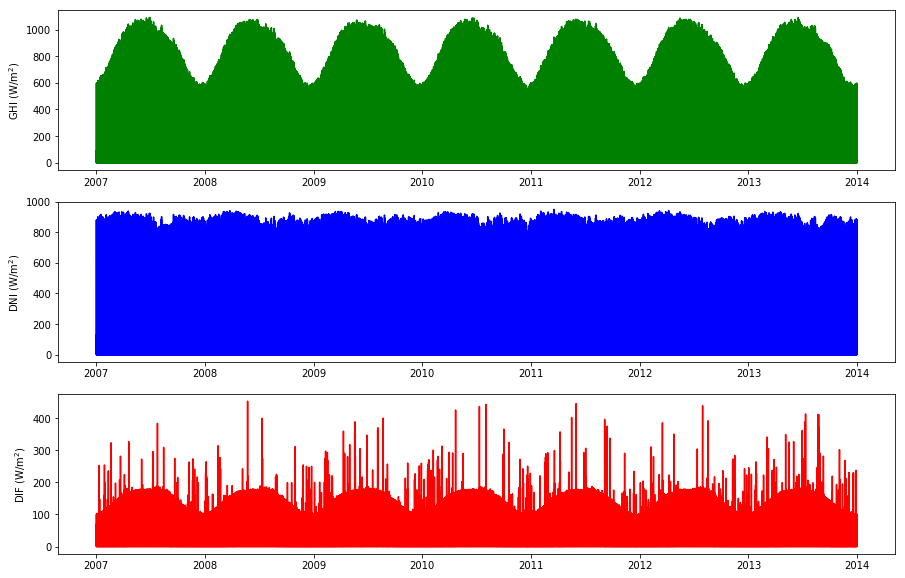

In [12]:
label = ["GHI (W/m$^2$)","DNI (W/m$^2$)","DIF (W/m$^2$)"]

plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.plot('GHI', data=data_site, color='g')
plt.ylabel(label[0])

plt.subplot(3,1,2)
plt.plot('DNI', data=data_site, color='b')
plt.ylabel(label[1])

plt.subplot(3,1,3)
plt.plot('DIF', data=data_site, color='r')
plt.ylabel(label[2])

plt.show()

## 3. Distributions
Only daylight periods are considered below. These are identified by considering zenith angles below 90$^\circ$, i.e., the sun is above the horizon. Note that the zenith angle is calculated using: GHI = DIF + $\cos\theta~\times$ DNI.

In [13]:
data_site['theta'] = np.degrees(np.arccos([val if abs(val) <= 1 else 0 for val in (data_site.GHI-data_site.DIF)/data_site.DNI]))

data_site_daylight = data_site.copy()

data_site_daylight = data_site_daylight.loc[data_site['theta'] < 90]
data_site_daylight['year'] = data_site_daylight.index.year
data_site_daylight['month'] = data_site_daylight.index.month

A google API is used to obtain the timezone of the selected site. Daylight saving time is not taken into account here. This could be done by replacing in the function below the current UNIX time by the one of each entry in `data_site_daylight`. 

In [14]:
import requests
import time

def timezone(latlong):
    result = {}
    url = 'https://maps.googleapis.com/maps/api/timezone/json?location={}&timestamp={}'
    request = url.format(latlong, str(time.time()).split(".")[0])
    data = requests.get(request).json()
    if len(data) > 0:
        result = data['timeZoneName']
    return result

In [15]:
tz = {'Hawaii Standard Time': -10, 
      'Alaska Daylight Time': -8, 
      'Pacific Daylight Time': -7, 
      'Mountain Standard Time': -7,
      'Mountain Daylight Time': -6,
      'Central Daylight Time': -5,
      'Eastern Daylight Time': -4}

tz_site = tz[timezone(",".join(map(str, [site[1],site[0]])))]
print("Timezone: UTC - %dh" % abs(tz_site))

Timezone: UTC - 7h


In [16]:
data_site_daylight['hour'] = (data_site_daylight.index + pd.to_timedelta("%dh" % tz_site)).hour

data_site_daylight.head()

,DIF,DNI,GHI,theta,year,month,hour
datetime,,,,,,,
2007-01-01 00:00:00,68.552185,127.513977,87.366882,81.515024,2007,1,17
2007-01-01 16:00:00,86.588623,314.470337,151.249756,78.134252,2007,1,9
2007-01-01 17:00:00,88.396851,694.265564,338.778351,68.860356,2007,1,10
2007-01-01 18:00:00,90.617065,827.112671,484.969635,61.524549,2007,1,11
2007-01-01 19:00:00,97.827087,872.890381,574.488037,56.902053,2007,1,12


### A. Histograms

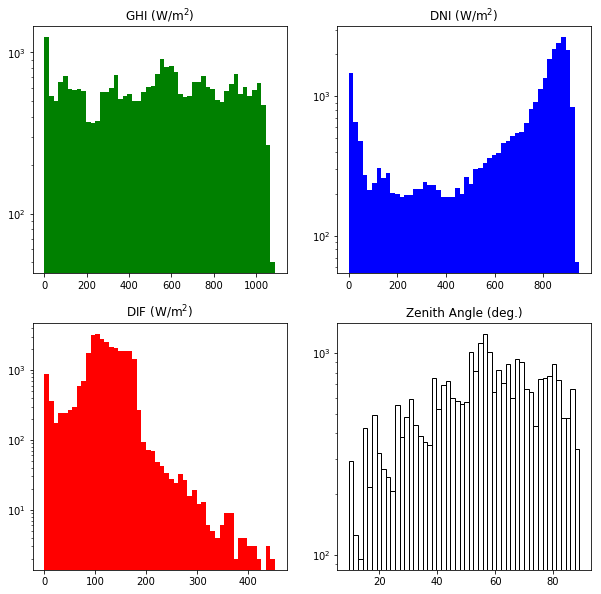

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))        

axes[0,0].hist(data_site_daylight.GHI, 50, color='g')
axes[0,0].semilogy()
axes[0,0].set_title(label[0])

axes[0,1].hist(data_site_daylight.DNI, 50, color='b')
axes[0,1].semilogy()
axes[0,1].set_title(label[1])

axes[1,0].hist(data_site_daylight.DIF, 50, color='r')
axes[1,0].semilogy()
axes[1,0].set_title(label[2])

axes[1,1].hist(data_site_daylight.theta,50, fill=False)
axes[1,1].semilogy()
axes[1,1].set_title('Zenith Angle (deg.)')

plt.show()

### B. Annual statistics

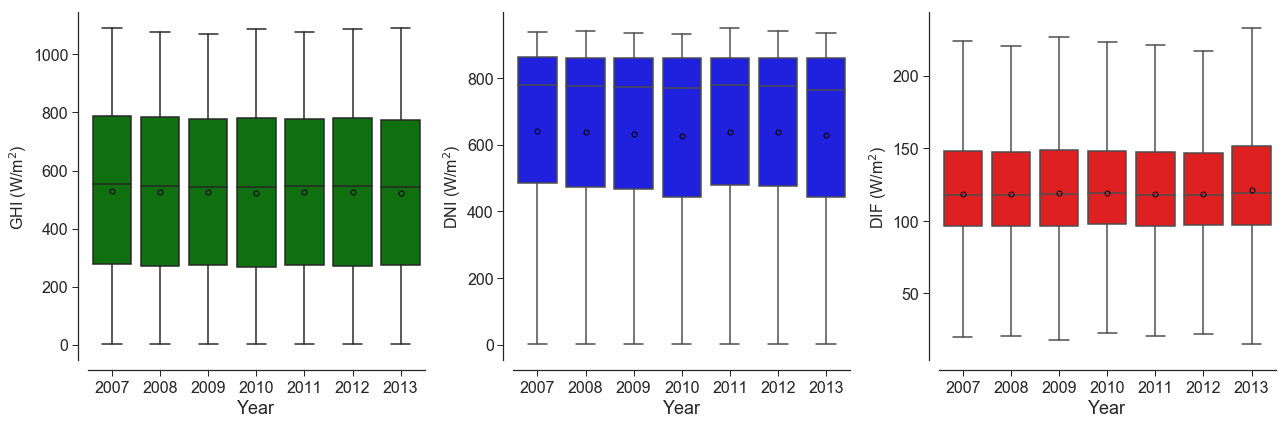

In [18]:
import seaborn as sns

sns.set_style("white")
sns.set_style("ticks")
mean_style = dict(marker='o', markeredgecolor='black', markerfacecolor="None", markersize=5)


fig, axes = plt.subplots(1, 3, figsize=(18,6))    

sns.boxplot(x='year', y='GHI', data=data_site_daylight, showfliers=False, 
            ax=axes[0], showmeans=True, meanprops=mean_style, color='g')
sns.boxplot(x='year', y='DNI', data=data_site_daylight, showfliers=False, 
            ax=axes[1], showmeans=True, meanprops=mean_style, color='b')
sns.boxplot(x='year', y='DIF', data=data_site_daylight, showfliers=False, ax=axes[2], 
            showmeans=True, meanprops=mean_style, color='r')


for i, l in enumerate(label):
    axes[i].set_ylabel(l, fontsize=16)
    axes[i].set_xlabel('Year', fontsize=18)
    axes[i].tick_params(axis='x', labelsize=16, width=1, length=6)
    axes[i].tick_params(axis='y', labelsize=16, width=1, length=6)

sns.despine(offset=10, trim=False)
fig.tight_layout()
plt.show()
plt.close()

### C. Monthly statistics

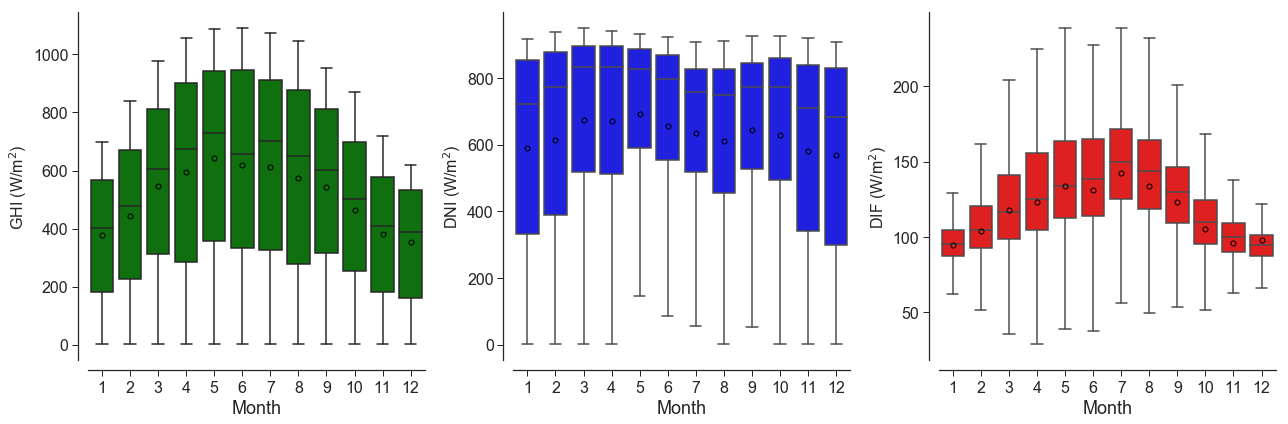

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))    

sns.boxplot(x='month', y='GHI', data=data_site_daylight, showfliers=False, 
            ax=axes[0], showmeans=True, meanprops=mean_style, color='g')
sns.boxplot(x='month', y='DNI', data=data_site_daylight, showfliers=False, 
            ax=axes[1], showmeans=True, meanprops=mean_style, color='b')
sns.boxplot(x='month', y='DIF', data=data_site_daylight, showfliers=False, 
            ax=axes[2], showmeans=True, meanprops=mean_style, color='r')

for i, l in enumerate(label):
    axes[i].set_ylabel(l, fontsize=16)
    axes[i].set_xlabel('Month', fontsize=18)
    axes[i].tick_params(axis='x', labelsize=16, width=1, length=6)
    axes[i].tick_params(axis='y', labelsize=16, width=1, length=6)

sns.despine(offset=10, trim=False)
fig.tight_layout()
plt.show()
plt.close()

### D. Diurnal statistics

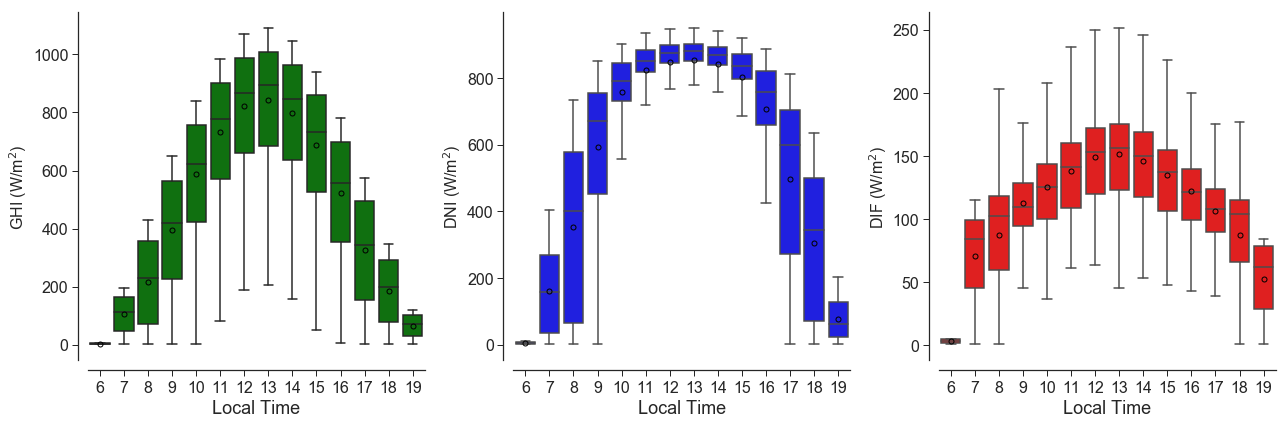

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))    

sns.boxplot(x='hour', y='GHI', data=data_site_daylight, showfliers=False, 
            ax=axes[0], showmeans=True, meanprops=mean_style, color='g')
sns.boxplot(x='hour', y='DNI', data=data_site_daylight, showfliers=False, 
            ax=axes[1], showmeans=True, meanprops=mean_style, color='b')
sns.boxplot(x='hour', y='DIF', data=data_site_daylight, showfliers=False, 
            ax=axes[2], showmeans=True, meanprops=mean_style, color='r')

for i, l in enumerate(label):
    axes[i].set_ylabel(l, fontsize=16)
    axes[i].set_xlabel('Local Time', fontsize=18)
    axes[i].tick_params(axis='x', labelsize=16, width=1, length=6)
    axes[i].tick_params(axis='y', labelsize=16, width=1, length=6)

sns.despine(offset=10, trim=False)
fig.tight_layout()
plt.show()
plt.close()